In [ ]:
#Mouting drive for getting access to MyDrive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sat Dec 12 20:47:25 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.7 gigabytes of available RAM

To enable a high-RAM runtime, select the Runtime > "Change runtime type"
menu, and then select High-RAM in the Runtime shape dropdown. Then, 
re-execute this cell.


In [ ]:
import os
print(os.listdir(r"drive/My Drive/CMPE-256-Project/yelp_dataset"))

['yelp_academic_dataset_business.json', 'yelp_academic_dataset_user.json', 'hashed_reviews_ph.csv']


In [ ]:
import pandas as pd

In [ ]:
# storing pandas dataframe as a picklefile for later use ...(Merged dataset for three files review, user, business)
if not os.path.isfile("drive/My Drive/CMPE-256-Project/YelpMergedData.pkl"):
    df_three_dataset_merged.to_pickle("drive/My Drive/CMPE-256-Project/YelpMergedData.pkl")
else:
    df_three_dataset_merged = pd.read_pickle("drive/My Drive/CMPE-256-Project/YelpMergedData.pkl")

In [ ]:
##Loading already merged dataframe(review,user,business)
df_three_dataset_merged.head(1)

,review_id,user_id,business_id,stars,business_name,city,state,categories,is_open,review_count_indi_bus,user_name,review_count_indi_user
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,Bellagio Gallery of Fine Art,Las Vegas,NV,"Shopping, Arts & Entertainment, Art Galleries,...",1,180,Jamie,58


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
df_three_dataset_merged.isnull().sum()

review_id                    0
user_id                      0
business_id                  0
stars                        0
business_name                0
city                         0
state                        0
categories                2202
is_open                      0
review_count_indi_bus        0
user_name                    0
review_count_indi_user       0
dtype: int64

In [ ]:
df_three_dataset_merged.shape

(8021122, 12)

In [ ]:
df_three_dataset_merged.dtypes

review_id                  object
user_id                    object
business_id                object
stars                     float64
business_name              object
city                       object
state                      object
categories                 object
is_open                     int64
review_count_indi_bus       int64
user_name                  object
review_count_indi_user      int64
dtype: object

In [ ]:
df_three_dataset_merged[(df_three_dataset_merged['is_open']==0)].shape

(1134597, 12)

From above we can see that the number of businesses closed permanently are 1134597. So we will delete theses busniesses for further analysis.

In [ ]:
df_three_dataset_merged[(df_three_dataset_merged['is_open']==1)].shape

(6886525, 12)

In [ ]:
# Get names of indexes for which column is_open has value 0
indexNames = df_three_dataset_merged[ df_three_dataset_merged['is_open'] == 0 ].index


In [ ]:
# Delete these row indexes from dataFrame
df_three_dataset_merged.drop(indexNames , inplace=True)

In [ ]:
df_three_dataset_merged.shape

(6886525, 12)

##Now we have dataset with only open businesses.

##Now fitering business according to categories which are 'restaurants' for further analysis.

In [ ]:
df_restaurant= df_three_dataset_merged[df_three_dataset_merged['categories'].str.contains('Restaurants')==True]

In [ ]:
df_restaurant.shape

(4222976, 12)

Now we have datset with businesses which are restaurants. So that is 4222976 rows/reviews.

In [ ]:
df_restaurant.dtypes

review_id                  object
user_id                    object
business_id                object
stars                     float64
business_name              object
city                       object
state                      object
categories                 object
is_open                     int64
review_count_indi_bus       int64
user_name                  object
review_count_indi_user      int64
dtype: object

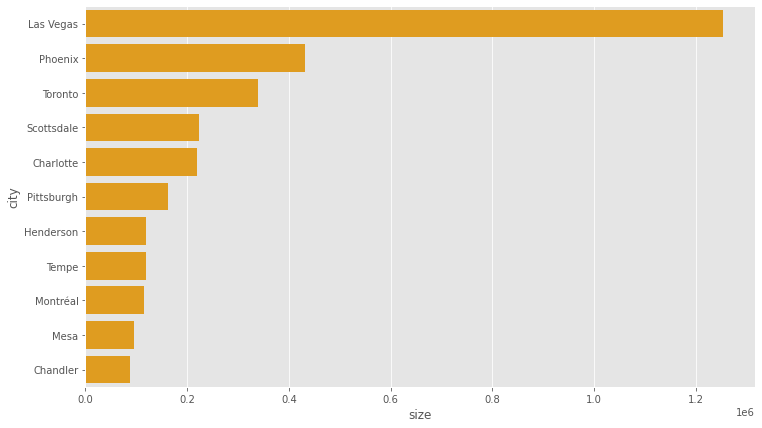

In [ ]:
city = df_restaurant.groupby('city')["review_id"].agg({'size'}).sort_values(ascending=False, by = 'size').reset_index().loc[0:10]

plt.figure(figsize = (12,7))
ax = sns.barplot(y="city", x="size", data=city,color ="orange")
plt.show()

As we can see from above that the most of the reviews are for Las Vegas city. So for further analysis we wanted to consider Las Vegas.But faced computationatal so went with Montreal city forsake of learning implementation.

In [ ]:
df_restaurant= df_restaurant[df_restaurant['city'].str.contains('Montreal')==True]

In [ ]:
df_restaurant.shape

(3437, 12)

Now, we have dataset with reviews for Montreal restaurants only which is total 3437.

In [ ]:
df_restaurant.head(3)

,review_id,user_id,business_id,stars,business_name,city,state,categories,is_open,review_count_indi_bus,user_name,review_count_indi_user
104360,4zrEV-CcS2BXzJ8vmlNdOg,kpGq2TvFxu39jVypQ0wlUw,kpuMEGNsjD4R5VnJa8IWTw,5.0,Dunn's Famous,Montreal,QC,"Restaurants, Delis, Sandwiches, Burgers, Pouti...",1,261,Ray,105
114541,OPSFeSErlxqJf4VkCIVVGw,53bZ_EsXH71L7iFs5MP9_w,i5XqKrdEFHvJpqAw3YKrag,5.0,Copper Branch,Montreal,QC,"Organic Stores, Restaurants, Food, Gluten-Free...",1,89,Cynthia,2015
123988,-xNli1Wzsv30GB6hhAEVQw,Rvn-Ymc8_9z4vbcm2ZwenQ,Dl3ty7Rt2WeBIAUoBF0EXg,3.0,Stash Café,Montreal,QC,"Restaurants, Polish",1,321,Ryna,1634


After cleaning and data processing it looks that index are all shuffled. So resetting index.

In [ ]:
df_restaurant = df_restaurant.reset_index(drop=True)

In [ ]:
df_restaurant.head(2)

,review_id,user_id,business_id,stars,business_name,city,state,categories,is_open,review_count_indi_bus,user_name,review_count_indi_user
0,4zrEV-CcS2BXzJ8vmlNdOg,kpGq2TvFxu39jVypQ0wlUw,kpuMEGNsjD4R5VnJa8IWTw,5.0,Dunn's Famous,Montreal,QC,"Restaurants, Delis, Sandwiches, Burgers, Pouti...",1,261,Ray,105
1,OPSFeSErlxqJf4VkCIVVGw,53bZ_EsXH71L7iFs5MP9_w,i5XqKrdEFHvJpqAw3YKrag,5.0,Copper Branch,Montreal,QC,"Organic Stores, Restaurants, Food, Gluten-Free...",1,89,Cynthia,2015


In [ ]:
df_restaurant.tail()

,review_id,user_id,business_id,stars,business_name,city,state,categories,is_open,review_count_indi_bus,user_name,review_count_indi_user
3432,nQ6kW3D9qscplBm01AtyhQ,FnG-s2YQWLLbbMU3jELxRg,jJALMyBDfqOjzuuQAooDtw,1.0,Atami,Montreal,QC,"American (New), Restaurants, Sushi Bars, Japanese",1,27,Camille,4
3433,05wNxs3Au9IUqQI1BovVMg,vXnv_93SJTK1e77g2CwO-g,jJALMyBDfqOjzuuQAooDtw,4.0,Atami,Montreal,QC,"American (New), Restaurants, Sushi Bars, Japanese",1,27,Mouhammed,1
3434,ZwLMsTAQg_TNVFzFm3ToSQ,402zlpuSONhaZzi-Lh3TxA,jJALMyBDfqOjzuuQAooDtw,5.0,Atami,Montreal,QC,"American (New), Restaurants, Sushi Bars, Japanese",1,27,Melissa,1
3435,7DfBy4ntlXAcAql4SGB67Q,NDlFt6-bBlBF2GqbmSbBRw,jJALMyBDfqOjzuuQAooDtw,5.0,Atami,Montreal,QC,"American (New), Restaurants, Sushi Bars, Japanese",1,27,Maurice,1
3436,niGWRkh58QnCj2BT_ECNBw,NXa23Wo95Bzgket6FNaVdg,fsZHFQ4zKjc8Tshvh7XI8g,1.0,Copper Branch,Montreal,QC,"Vegetarian, Restaurants, Gluten-Free, Vegan",1,4,XJ,1


So now we have properly indexed rows for further processing.

It's possible users to have same name so we will be using user_id for further processing.

In [ ]:
df_restaurant["business_id"].nunique() 

69

In [ ]:
df_restaurant["business_name"].nunique() 

56

From above observation we can see that unique business name are 56 but unique business ids are 69 which is greater than business_name .So its possible that there are multiple businesses with same name.So we cannot use business_name either for further processing for recommendation system.

##Now we will be dropping columns which are not needed for futher analysis and will only be keeping the columns "user_id", "business_id", "stars".

In [ ]:
df_restaurant = df_restaurant.drop(columns=['city'])

In [ ]:
df_restaurant.dtypes

review_id                  object
user_id                    object
business_id                object
stars                     float64
business_name              object
state                      object
categories                 object
is_open                     int64
review_count_indi_bus       int64
user_name                  object
review_count_indi_user      int64
dtype: object

In [ ]:
df_restaurant = df_restaurant.drop(columns=['review_id','state','categories','is_open','user_name','review_count_indi_bus','review_count_indi_user'])

In [ ]:
df_restaurant.dtypes

user_id           object
business_id       object
stars            float64
business_name     object
dtype: object

In [ ]:
df_restaurant.head(2)

,user_id,business_id,stars,business_name
0,kpGq2TvFxu39jVypQ0wlUw,kpuMEGNsjD4R5VnJa8IWTw,5.0,Dunn's Famous
1,53bZ_EsXH71L7iFs5MP9_w,i5XqKrdEFHvJpqAw3YKrag,5.0,Copper Branch


In [ ]:
df_restaurant.shape

(3437, 4)

In [ ]:
# storing pandas dataframe as a picklefile for later use ...(Merged dataset for three files review, user, business)
if not os.path.isfile("drive/My Drive/CMPE-256-Project/MonYelpMergedData(final_processed).pkl"):
    df_restaurant.to_pickle("drive/My Drive/CMPE-256-Project/MonYelpMergedData(final_processed).pkl")
else:
    df_restaurant = pd.read_pickle("drive/My Drive/CMPE-256-Project/MonYelpMergedData(final_processed).pkl")

In [ ]:
df_restaurant.head()

,user_id,business_id,stars,business_name
0,kpGq2TvFxu39jVypQ0wlUw,kpuMEGNsjD4R5VnJa8IWTw,5.0,Dunn's Famous
1,53bZ_EsXH71L7iFs5MP9_w,i5XqKrdEFHvJpqAw3YKrag,5.0,Copper Branch
2,Rvn-Ymc8_9z4vbcm2ZwenQ,Dl3ty7Rt2WeBIAUoBF0EXg,3.0,Stash Café
3,CY9iLsE2z_yLhLqJdD1WGw,kpuMEGNsjD4R5VnJa8IWTw,5.0,Dunn's Famous
4,_muhtS8ZFnV61s7Q4JXDwQ,lcTa0q9Wo4wNyLCIgWFRUA,4.0,La Société Montréal


In [ ]:
#To change the used_id and business_id in the dataframe to numerical values
def conv_to_num(data, term, new_term):
    distinct_vals = data[term].unique()
    num_of_distinct = len(distinct_vals)
    data_distinct_id = pd.DataFrame(data=distinct_vals, index=range(0,num_of_distinct), columns=[term])
    data_distinct_id.index.name = new_term
    data_distinct_id.reset_index(drop=False, inplace=True)
    data = data.merge(data_distinct_id, how='left', on=term)
    return data

In [ ]:
##multiple users can review same business
df_restaurant = conv_to_num(df_restaurant, 'user_id', 'user_id_key')
df_restaurant = conv_to_num(df_restaurant, 'business_id', 'business_id_key')

business_id_key_name = df_restaurant.groupby('business_id_key')['business_id'].max()

In [ ]:
mask_ids = ['user_id_key','business_id_key','stars','business_name']

df_restaurant = df_restaurant[mask_ids]

In [ ]:
df_restaurant.shape

(3437, 4)

In [ ]:
df_restaurant.head()

,user_id_key,business_id_key,stars,business_name
0,0,0,5.0,Dunn's Famous
1,1,1,5.0,Copper Branch
2,2,2,3.0,Stash Café
3,3,0,5.0,Dunn's Famous
4,4,3,4.0,La Société Montréal


In [ ]:
df_restaurant.dtypes

user_id_key          int64
business_id_key      int64
stars              float64
business_name       object
dtype: object

In [ ]:
df_restaurant.to_csv("drive/My Drive/CMPE-256-Project/MonYelpMergedData(final_processed).csv", index=False)

In [ ]:
df_test=pd.read_csv("drive/My Drive/CMPE-256-Project/MonYelpMergedData(final_processed).csv")

In [ ]:
df_test

,user_id_key,business_id_key,stars,business_name
0,0,0,5.0,Dunn's Famous
1,1,1,5.0,Copper Branch
2,2,2,3.0,Stash Café
3,3,0,5.0,Dunn's Famous
4,4,3,4.0,La Société Montréal
...,...,...,...,...
3432,2915,44,1.0,Atami
3433,2916,44,4.0,Atami
3434,2917,44,5.0,Atami
3435,2918,44,5.0,Atami


So, we can see that unique business ids are 68 and users are 2919.

After this the prcoessed csv file was loaded and used for building recommendation system using Spark ALS.